<img src="img/Insurance.jpg" width="1650" height="450"/>

# Insurance All

Insurance All is a company that provides health insurance to its customers and the product team is analyzing the possibility of offering policyholders a new product: auto insurance.

As with health insurance, customers of this new auto insurance plan need to pay an amount annually to Insurance All to obtain an amount insured by the company, intended for the costs of an eventual accident or damage to the vehicle.

Insurance All conducted a survey of about 380,000 customers about their interest in joining a new auto insurance product last year. All customers expressed interest or not in purchasing auto insurance and these responses were saved in a database along with other customer attributes.

The product team selected 127 thousand new customers who did not respond to the survey to participate in a campaign, in which they will receive the offer of the new auto insurance product. The offer will be made by the sales team through telephone calls.

However, the sales team has the capacity to make 20 thousand calls within the campaign period.

### The challenge ###

In that context, you were hired as a Data Science consultant to build a model that predicts whether or not the customer would be interested in auto insurance.

With its solution, the sales team hopes to be able to prioritize the people with the greatest interest in the new product and, thus, optimize the campaign by making only contacts with customers most likely to make the purchase.

As a result of your consultancy, you will need to deliver a report containing some analysis and answers to the following questions:

- Main Insights on the most relevant attributes of customers interested in purchasing auto insurance.
- What percentage of customers interested in purchasing auto insurance will the sales team be able to reach by making 20,000 calls?
- And if the sales team's capacity increases to 40,000 calls, what percentage of customers interested in purchasing auto insurance will the sales team be able to contact?
- How many calls does the sales team need to make to contact 80% of customers interested in purchasing auto insurance?

### How Insurance Companies Work

- Insurance companies assess the risk and charge premiums for various types of insurance coverage. If an insured event occurs and you suffer damages, the insurance company pays you up to the agreed amount of the insurance policy. The way insurance companies work, they can pay this and still make a profit.

Evaluating Risk

- Companies that buy insurance policies transfer their risk to the insurance company in return for paying their premiums. The insurance company has to define insurance risk it is taking on. It asks questions, each of which is designed to evaluate a particular risk. Depending on your answers to the questions, the insurance company quotes you a premium. If your risk is higher than usual – for example, if you are not near a fire hydrant, then your fire insurance will be higher. If you don't answer the questions honestly, the insurance company may refuse to pay if there are damages, according to the Insurance Institute of Michigan.

Shared Risk

- Your premiums are much lower than the possible damages, but the insurance company can afford to pay them because it receives premiums from many customers. Insurance companies operate on the principle of shared risk. All the customers pay small amounts and share the risk that way. A fire or other covered event only happens rarely. The insurance company has to calculate the premiums so the total premiums it receives from its many customers cover the few damage claims, with some money left over for administration and profit.


Re-Insurance

- Insurance companies have to consider that, if they have a lot of policies in one area and there is a natural disaster, many customers will make a claim. The insurance company may not have collected enough premiums to cover so many claims. To prevent such a problem, insurance companies pass on some of the risk to other large financial firms that offer re-insurance, meaning they may be protected in a worst case scenario.
The large firms take over the extra risk from the insurance company that holds the policies, and it pays for this service. For major natural disasters, the re-insurance companies pay for some of the damages through the local insurance companies that sold the policies.

Investment Income

- Over time, insurance companies receive lots of small amounts in premiums and have to occasionally pay out large amounts. Before paying out the damages, they may have large surpluses which they invest, according to Obrella. Because they don't want to take much additional risk, they typically place this money in safe investments, but it still generates a substantial income. This income increases the revenue of the insurance companies, and they can use it to reduce the premiums they charge or to increase their profits.

Source: https://smallbusiness.chron.com/insurance-companies-work-60269.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import numpy as np

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

Id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [4]:
train.shape

(381109, 12)

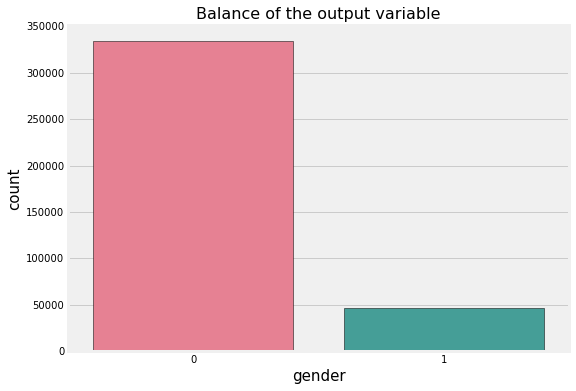

In [5]:
plt.figure(figsize=(8,6))

sns.countplot(x="Response", data = train, palette ="husl" ,edgecolor="black")
plt.ylabel('count', fontsize=15)
plt.xlabel('gender', fontsize=15)
plt.title('Balance of the output variable', fontsize=16)
plt.show()

# Feature Engineering

### Age range

In [6]:
train['age_range'] = train['Age'].apply(lambda x: 'Adult 1' if 20<x<30 else('Adult 2' if 30 < x < 40 else('Adult 3' if 40<x<65 else 'Elderly')))

### Monthly premium

In [7]:
train['monthly_premium'] = round(train['Annual_Premium']/12, 2)

### Percentage of total premium

In [8]:
train['percentage_total_premium'] = train['Annual_Premium']/train['Annual_Premium'].sum()

In [9]:
df = pd.get_dummies(train['Vehicle_Damage'], prefix='Vehicle_Damage').rename(columns={'vehicle_damage_0':'vehicle_damage_no', 'vehicle_damage_1':'vehicle_damage_yes'})

In [10]:
train  = pd.concat([train, df], axis=1)

### insured_with_no_damage

In [11]:
train['insured_with_no_damage'] = train['Previously_Insured']*train['Vehicle_Damage_No']

### not_insured_with_damage

In [12]:
train["not_insured_with_damage"] = train["Previously_Insured"].apply(lambda x: 1 if x == 0 else 0) * train["Vehicle_Damage_Yes"]

### vehicle age < 1_year

In [13]:
train["vehicle_age_<_1_year"] = train["Vehicle_Age"].apply(lambda x: 1 if x=='< 1 Year' else 0)

### new_damage_no_insurance

In [14]:
train["new_damage_no_insurance"] = train["vehicle_age_<_1_year"]*train["not_insured_with_damage"]

In [15]:
train.head()

Id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  ...  \
0   > 2 Years            Yes         40454.0                  26.0  ...   
1    1-2 Year             No         33536.0                  26.0  ...   
2   > 2 Years            Yes         38294.0                  26.0  ...   
3    < 1 Year             No         28619.0                 152.0  ...   
4    < 1 Year             No         27496.0                 152.0  ...   

   Response  age_range monthly_premium  percentage_total_premium  \
0         1    Adult 3         3371.17                  0.000003   
1         0    Elderly         2794.67                  0.000003   
2         1    Adult 3         3191.17                  0.000003   
3         0    Adult 1         2384.92                  0.000002   
4         0    Adult 1         2291.33                  0.000002   

   Vehicle_Damage_No  Vehicle_Damage_Yes  insured_with_no_damage  \
0                  0                   1                       0   
1                  1                   0                       0   
2                  0                   1                       0   
3                  1                   0                       1   
4                  1                   0                       1   

   not_insured_with_damage  vehicle_age_<_1_year  new_damage_no_insurance  
0                        1                     0                        0  
1                        0                     0                        0  
2                        1                     0                        0  
3                        0                     1                        0  
4                        0                     1                        0  

[5 rows x 21 columns]

# Feature analysis and selection

In [16]:
numerical_variables = train.select_dtypes(include = [np.number])

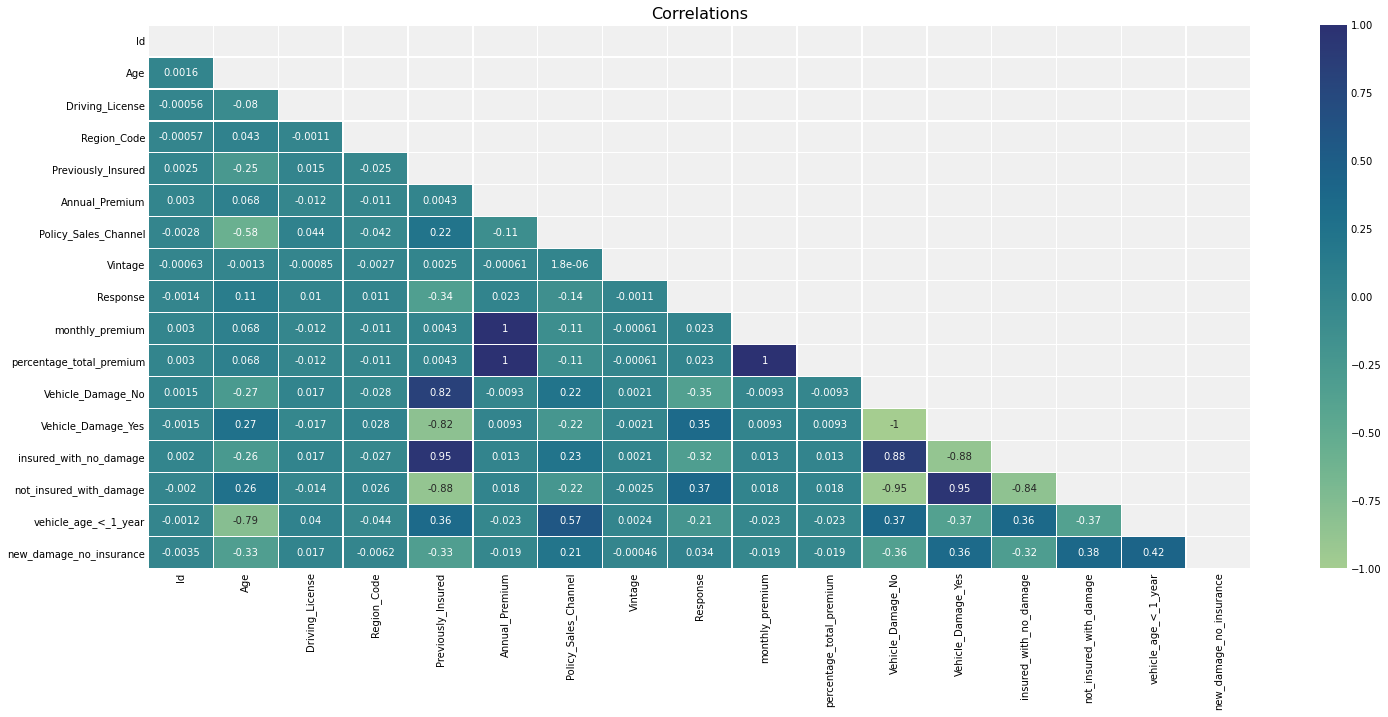

In [17]:
# calculates the correlations
correlations = numerical_variables.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(22, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 12, as_cmap=True)

# plots the heatmap
sns.heatmap(correlations, cmap="crest", mask=mask, linewidths=.5, annot=True)
plt.title('Correlations', fontsize=16)

# displays the plot
plt.show()

In [18]:
categorical_features = train.select_dtypes(exclude=[np.number])

### ANOVA for categorical features

In [19]:
import scipy.stats

cat_features = categorical_features.columns
train[cat_features] = train[cat_features]


anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
  group_prices = []
  for group in train[cat].unique():
      group_prices.append(train[train[cat] == group]['Response'].values)
  f, p = scipy.stats.f_oneway(*group_prices)
  anova['feature'].append(cat)
  anova['f'].append(f)
  anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace = True)

# p < 0.05
# H0: categorical features don't have any influence in the response (Null hypothesis)

# If p > 0.05 then H0 hypothesis is denied

In [20]:
anova

feature             f              p
1     Vehicle_Age   9872.132435   0.000000e+00
2  Vehicle_Damage  54742.245365   0.000000e+00
3       age_range   6341.174666   0.000000e+00
0          Gender   1050.913073  3.180742e-230

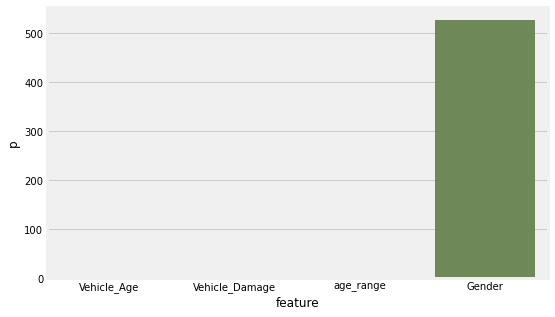

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.show()

# Encoder

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
train['Gender'] = le.fit_transform(train['Gender'])
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])
train['age_range'] = le.fit_transform(train['age_range'])

In [25]:
y = train['Response'].copy()
X = train.drop('Response', axis=1).copy()

# Oversampling (ADASYN)

In [26]:
from imblearn.over_sampling import ADASYN

In [27]:
adasyn = ADASYN()

In [28]:
X_adasyn, y_adasyn = adasyn.fit_resample(X,y)

In [29]:
print('The number of lines before oversampling : {}'.format(X.shape[0]))
print('The number of lines after oversampling : {}'.format(X_adasyn.shape[0]))

The number of lines before oversampling : 381109
The number of lines after oversampling : 673035


In [30]:
import matplotlib.pyplot as plt

Now the training data is shorter but the classes are balanced


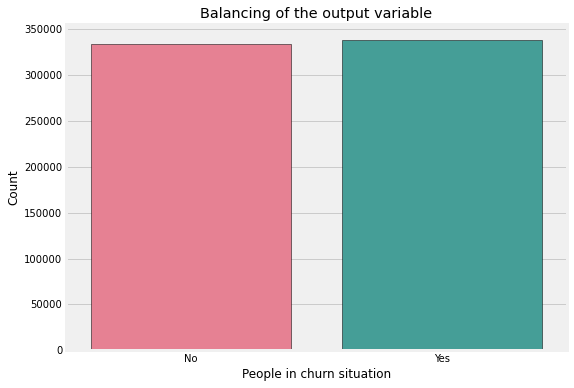

In [31]:
print("Now the training data is shorter but the classes are balanced")

# sets the plot size
plt.figure(figsize=(8,6))

# counts each class for the target var
ax = sns.countplot(x=y_adasyn, palette ="husl", edgecolor="black")

# sets plot features
plt.title("Balancing of the output variable")
plt.xlabel("People in churn situation")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No','Yes'])

# displays the plot
plt.show()

# Feature Importance (Random Forest)

In [32]:
x_train, x_val, y_train, y_val = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=72)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(random_state=1)

In [35]:
rf.fit(X_adasyn, y_adasyn)

RandomForestClassifier(random_state=1)

In [36]:
importances = rf.feature_importances_

In [37]:
importance = list(importances)

In [38]:
colum = list(X_adasyn.columns)

In [39]:
feature_importance = pd.DataFrame(zip(colum, importance), columns=['Feature', 'Importance']).sort_values('Importance')

In [40]:
feature_importance = feature_importance.set_index('Feature')

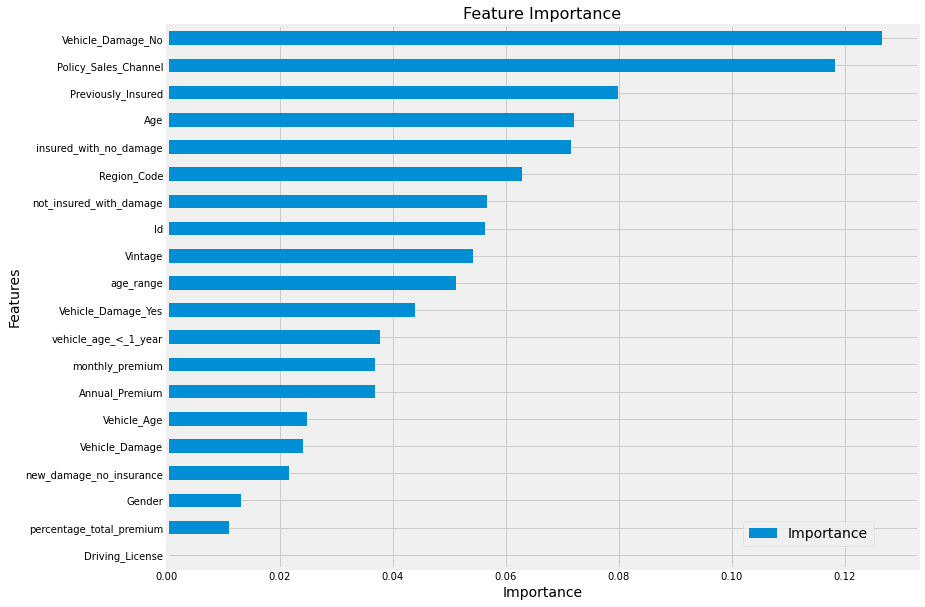

In [41]:
feature_importance.plot(kind='barh', figsize=(12,10))
plt.title('Feature Importance', fontsize=16)
plt.legend(bbox_to_anchor=(0.95, 0.1), fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Importance', fontsize=14)
plt.show()

# Permutation Importance

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

In [42]:
from sklearn.linear_model import Ridge

In [43]:
model = Ridge(alpha=1e-2).fit(x_train, y_train)

In [44]:
model.score(x_val, y_val)

0.5251837053352331

In [45]:
feature_names = x_train.columns

In [46]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, x_val, y_val, n_repeats=30,random_state=0)

permutation_importance_name = []
permutation_importance_mean = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

        permutation_importance_name.append(feature_names[i])
        permutation_importance_mean.append(r.importances_mean[i]) 

Annual_Premium  617362.364 +/- 1475.286
monthly_premium  617317.264 +/- 1476.099
Previously_Insured  1.185 +/- 0.004
Vehicle_Damage_No  1.150 +/- 0.003
insured_with_no_damage  1.029 +/- 0.003
new_damage_no_insurance  0.099 +/- 0.001
not_insured_with_damage  0.066 +/- 0.001
age_range  0.061 +/- 0.001
vehicle_age_<_1_year  0.050 +/- 0.001
Gender    0.014 +/- 0.000
Age       0.010 +/- 0.000
Policy_Sales_Channel  0.004 +/- 0.000
Vehicle_Age  0.003 +/- 0.000
Driving_License  0.000 +/- 0.000
Vehicle_Damage_Yes  0.000 +/- 0.000
Vehicle_Damage  0.000 +/- 0.000


# Boruta

Basically, you choose a model of convenience — capable of capturing non-linear relationships and interactions, e.g. a random forest — and you fit it on X and y. Then, you extract the importance of each feature from this model and keep only the features that are above a given threshold of importance.

In Boruta, features do not compete among themselves. Instead — and this is the first brilliant idea — they compete with a randomized version of them.

binomial distribution
As often happens in machine learning (in life?), the key is iteration. Not surprisingly, 20 trials are more reliable than 1 trial and 100 trials are more reliable than 20 trials.

In [47]:
!pip install Boruta==0.3

In [48]:
#from boruta import BorutaPy

###initialize Boruta
#forest = RandomForestRegressor(
#   n_jobs = -1, 
#   max_depth = 5
#)

#boruta = BorutaPy(
#   estimator = rf, 
#   n_estimators = 'auto',
#   max_iter = 20 # number of trials to perform
#)
### fit Boruta (it accepts np.array, not pd.DataFrame)
#boruta.fit(np.array(X_adasyn), np.array(y_adasyn))
### print results
#green_area = X_adasyn.columns[boruta.support_].to_list()
#blue_area = X_adasyn.columns[boruta.support_weak_].to_list()
#print('features in the green area:', green_area)
#print('features in the blue area:', blue_area)

Features selected by Boruta

- id, Age, Region_Code, Previously_Insured, Policy_Sales_Channel, Vintage, age_range, Vehicle_Damage_No, Vehicle_Damage_Yes, insured_with_no_damage, not_insured_with_damage, vehicle_age_<_1_year

## Summary

___
** - Results from ANOVA**

Vehicle_Age, Vehicle_Damage, age_range and Gender all of them have influence in the output variable.
___
** - Feature Importance using Random Forest (Top 5 features)**

percentage_total_premium, Policy_Sales_Channel, Previously_Insured, Vehicle_Damage_Yes and Age.
___

** - Permutation Importance (excluding features with high standard deviation)**

Top 5 features
Previously_Insured, percentage_total_premium, Vehicle_Damage_Yes, vehicle_age_<_1_year and insured_with_no_damage.
___

** - Boruta**

Features selected
id, Age, Region_Code, Previously_Insured, Policy_Sales_Channel, Vintage, age_range, Vehicle_Damage_No, Vehicle_Damage_Yes, insured_with_no_damage, not_insured_with_damage, vehicle_age_<_1_year
___

**Assumptions**

- age_range came from Age, features related to customer age were indicated in three analysis (ANOVA, Feature Importance and Boruta)
- percentage_total_premium was indicated in two analysis (Feature Importance and Permutation Importance)
- Features related to vehicle damage were indicated in all analysis(ANOVA, Feature Importance, Permutation Importance and Boruta)
- Policy_Sales_Channel was indicated in two analysis(Feature Importance and Boruta)
- Previous_Insured was indicated in three analysis(Feature Importance, Permutation Importance and Boruta)
___


In [49]:
x_train.columns

Index(['Id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'age_range', 'monthly_premium',
       'percentage_total_premium', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes',
       'insured_with_no_damage', 'not_insured_with_damage',
       'vehicle_age_<_1_year', 'new_damage_no_insurance'],
      dtype='object')

In [50]:
x_train_selected = x_train[['percentage_total_premium','Vehicle_Damage_Yes', 'Age', 'Previously_Insured', 'Policy_Sales_Channel']]

In [51]:
x_val_selected = x_val[['percentage_total_premium','Vehicle_Damage_Yes', 'Age', 'Previously_Insured', 'Policy_Sales_Channel']]

In [52]:
x_val_selected

percentage_total_premium  Vehicle_Damage_Yes  Age  Previously_Insured  \
592874              2.716876e-06                   1   36                   0   
602093              3.148292e-06                   1   45                   0   
584082              2.015940e-06                   1   49                   0   
538173              1.774659e-06                   1   32                   0   
521526              3.454106e-06                   1   39                   0   
...                          ...                 ...  ...                 ...   
624195              2.257828e-07                   1   38                   0   
29974               3.583851e-06                   1   68                   0   
639038              2.216339e-06                   1   38                   0   
163755              2.716691e-06                   0   24                   1   
82952               2.257828e-07                   0   32                   1   

        Policy_Sales_Channel  
592874            124.000000  
602093             49.312796  
584082            127.416767  
538173            146.584612  
521526            142.524877  
...                      ...  
624195             86.259677  
29974             124.000000  
639038             83.414770  
163755            152.000000  
82952              26.000000  

[201911 rows x 5 columns]

___

# Model Building

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score

- Decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train_selected, y_train)
y_pred_dt = dt.predict(x_val_selected)
acc_dt = accuracy_score(y_val, y_pred_dt)
f1_score_dt = f1_score(y_val, y_pred_dt)
recall_score_dt = recall_score(y_val, y_pred_dt)
precision_score_dt = precision_score(y_val, y_pred_dt)

In [56]:
print('The average accuracy is: {}'.format(acc_dt))

The average accuracy is: 0.8665847824041285


- Random Forest

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train_selected, y_train)
y_pred_rf = rf.predict(x_val_selected)
acc_rf = accuracy_score(y_val, y_pred_rf)
f1_score_rf = f1_score(y_val, y_pred_rf)
recall_score_rf = recall_score(y_val, y_pred_rf)
precision_score_rf = precision_score(y_val, y_pred_rf)

In [58]:
print('The average accuracy is: {}'.format(acc_rf))

The average accuracy is: 0.8644798946070298


- XGBoost

In [59]:
import xgboost as xgb

In [60]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train_selected, y_train)
y_pred_xgb = xgb.predict(x_val_selected)
acc_xgb = accuracy_score(y_val, y_pred_xgb)
f1_score_xgb = f1_score(y_val, y_pred_xgb)
recall_score_xgb = recall_score(y_val, y_pred_xgb)
precision_score_xgb = precision_score(y_val, y_pred_xgb)

[16:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
print('The average accuracy is: {}'.format(round(acc_xgb,3)))

The average accuracy is: 0.872


- LGBM

In [62]:
from lightgbm import LGBMClassifier

In [63]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_selected, y_train)
y_pred_lgbm = lgbm.predict(x_val_selected)
acc_lgbm = accuracy_score(y_val, y_pred_lgbm)
f1_score_lgbm = f1_score(y_val, y_pred_lgbm)
recall_score_lgbm = recall_score(y_val, y_pred_lgbm)
precision_score_lgbm = precision_score(y_val, y_pred_lgbm)

In [64]:
print('The average accuracy is: {}'.format(round(acc_lgbm,3)))

The average accuracy is: 0.862


- K Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier() 
knn.fit(x_train_selected, y_train)  
y_pred_knn = knn.predict(x_val_selected)  
acc_knn = accuracy_score(y_val, y_pred_knn)
f1_score_knn = f1_score(y_val, y_pred_knn)
recall_score_knn = recall_score(y_val, y_pred_knn)
precision_score_knn = precision_score(y_val, y_pred_knn)

In [67]:
print('The average accuracy is: {}'.format(round(acc_knn,3)))

The average accuracy is: 0.846


- Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log = LogisticRegression()
log.fit(x_train_selected, y_train)  
y_pred_log = log.predict(x_val_selected)  
acc_log = accuracy_score(y_val, y_pred_log)
f1_score_log = f1_score(y_val, y_pred_log)
recall_score_log = recall_score(y_val, y_pred_log)
precision_score_log = precision_score(y_val, y_pred_log)

In [70]:
print('The average accuracy is: {}'.format(round(acc_log,3)))

The average accuracy is: 0.777


- Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier

In [72]:
bag = BaggingClassifier()
bag.fit(x_train_selected, y_train)  
y_pred_bag = bag.predict(x_val_selected)  
acc_bag = accuracy_score(y_val, y_pred_bag)
f1_score_bag = f1_score(y_val, y_pred_bag)
recall_score_bag = recall_score(y_val, y_pred_bag)
precision_score_bag = precision_score(y_val, y_pred_bag)

In [73]:
print('The average accuracy is: {}'.format(round(acc_bag,3)))

The average accuracy is: 0.867


- Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gbst = GradientBoostingClassifier()
gbst.fit(x_train_selected, y_train)  
y_pred_gbst = gbst.predict(x_val_selected)  
acc_gbst = accuracy_score(y_val, y_pred_gbst)
f1_score_gbst = f1_score(y_val, y_pred_gbst)
recall_score_gbst = recall_score(y_val, y_pred_gbst)
precision_score_gbst = precision_score(y_val, y_pred_gbst)

In [76]:
print('The average accuracy is: {}'.format(round(acc_gbst,3)))

The average accuracy is: 0.855


In [77]:
results = pd.DataFrame({
    'Model': ['Decision tree', 'Random Forest', 'XGBoost', 'LGBM', 'K Nearest Neighbor', 'Logistic Regression', 'Bagging Classifier', 'Gradient Boosting Classifier'],
    'Accuracy': [acc_dt, acc_rf, acc_xgb, acc_lgbm, acc_knn, acc_log, acc_bag, acc_gbst],
    'Recall': [recall_score_dt, recall_score_rf, recall_score_xgb, recall_score_lgbm, recall_score_knn, recall_score_log, recall_score_bag, recall_score_gbst],
    'Precision': [precision_score_dt, precision_score_rf, precision_score_xgb, precision_score_lgbm, precision_score_knn, precision_score_log, precision_score_bag, precision_score_gbst],    
    'F1-score': [f1_score_dt, f1_score_rf, f1_score_xgb, f1_score_lgbm, f1_score_knn, f1_score_log, f1_score_bag, f1_score_gbst]})
result = results.sort_values(by='F1-score', ascending=False)
result = result.set_index('Model')
display(result.head(10))

Accuracy    Recall  Precision  F1-score
Model                                                                
XGBoost                       0.872067  0.895712   0.856110  0.875463
Bagging Classifier            0.866857  0.894785   0.848312  0.870929
Decision tree                 0.866585  0.892595   0.849326  0.870423
Random Forest                 0.864480  0.895969   0.843753  0.869077
LGBM                          0.861617  0.894321   0.840296  0.866468
Gradient Boosting Classifier  0.855283  0.928584   0.810682  0.865637
K Nearest Neighbor            0.845843  0.843406   0.848596  0.845993
Logistic Regression           0.776748  0.960884   0.703186  0.812081

### Chosing the best hyperparameters using GridSearchCV

In [78]:
#param_grid = {"n_estimators": [100,200,300],
#              "max_depth": [4,5,6]} 
#xgb_grid_selected = GridSearchCV(xgb, cv=KFold(n_splits = 5, shuffle=True), param_grid=param_grid, scoring='accuracy')
#eval_set = [(x_train_selected, y_train), (x_val_selected, y_val)]
#xgb_grid_selected.fit(x_train_selected, y_train , eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
#xgb_grid_selected.fit(x_train_selected, y_train)
#best_xgb_selected = xgb_grid_selected.best_estimator_

#print(best_xgb_selected)

[16:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Best model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
from xgboost import XGBClassifier

In [82]:
best_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=300, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
eval_set = [(x_train_selected, y_train), (x_val_selected, y_val)]

best_model.fit(x_train_selected, y_train , eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17256	validation_0-logloss:0.54892	validation_1-error:0.17185	validation_1-logloss:0.54863
[1]	validation_0-error:0.16131	validation_0-logloss:0.48020	validation_1-error:0.16099	validation_1-logloss:0.47973
[2]	validation_0-error:0.16199	validation_0-logloss:0.42451	validation_1-error:0.16162	validation_1-logloss:0.42406
[3]	validation_0-error:0.15973	validation_0-logloss:0.39360	validation_1-error:0.15937	validation_1-logloss:0.39294
[4]	validation_0-error:0.15730	validation_0-logloss:0.37206	validation_1-error:0.15718	validation_1-logloss:0.37154
[5]	validation_0-error:0.15493	validation_0-logloss:0.35405	validation_1-error:0.15494	validation_1-logloss:0.35369
[6]	validation_0-error:0.15482	validation_0-logloss:0.34282	validation_1-error:0.15444	validation_1-logloss:0.34249
[7]	validation_0-error:0.15263	validation_0-logloss:0.33307	validation_1-error:0.15249	validation_1-logloss:0.33276
[8]	validation_0-error:0.15237	validation_0-logloss:0.32777	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Plotting the Loss and error to check the overfitting

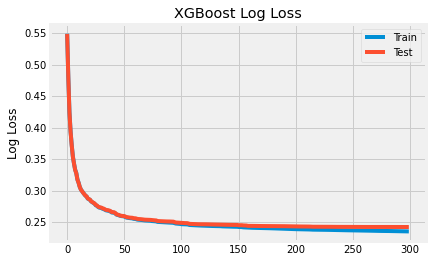

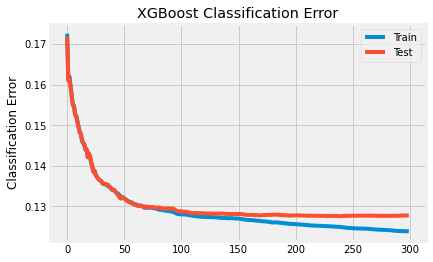

In [86]:
# retrieve performance metrics
results = best_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [87]:
y_pred_xgb_best_model = best_model.predict(x_val_selected)

In [88]:
print(classification_report(y_val, y_pred_xgb_best_model))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87    100547
           1       0.86      0.89      0.88    101364

    accuracy                           0.87    201911
   macro avg       0.87      0.87      0.87    201911
weighted avg       0.87      0.87      0.87    201911



### Confusion matrix

In [89]:
from sklearn.metrics import plot_confusion_matrix

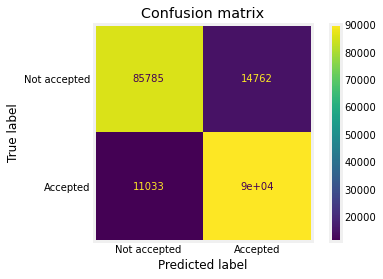

In [97]:
plot_confusion_matrix(best_xgb_selected, x_val_selected, y_val) 
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

### Comparison of the different models

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

[17:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.943
Random Forest: ROC AUC=0.953
XGBoost: ROC AUC=0.958
LGBM: ROC AUC=0.951
KNN: ROC AUC=0.930
Logistic Regression: ROC AUC=0.816
Bagging Classifier: ROC AUC=0.952
Gradient Boosting Classifier: ROC AUC=0.945


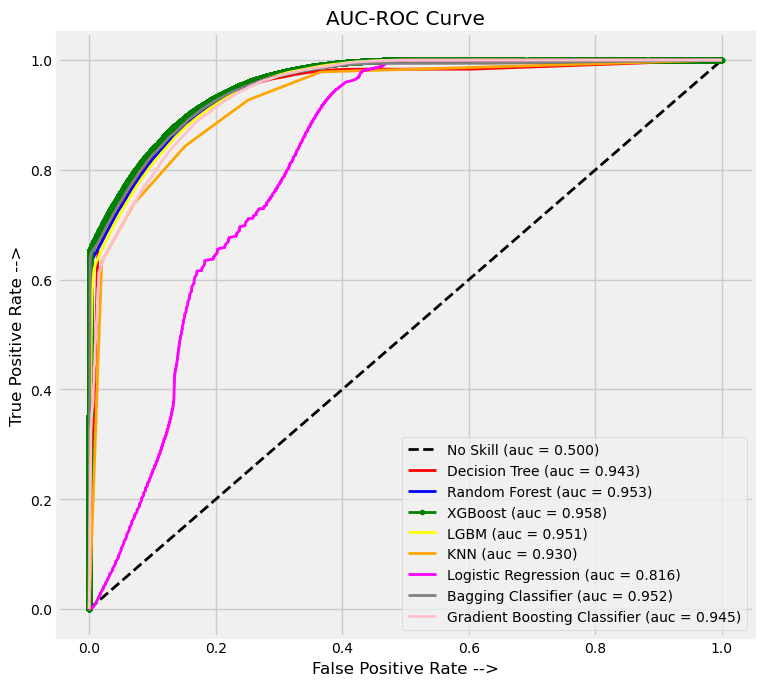

In [99]:
ns_probs = [0 for _ in range(len(y_val))]


# fit a model
SEED=1

dt_clf = DecisionTreeClassifier(random_state=SEED)
rf_clf = RandomForestClassifier(random_state=SEED)
xgb_clf = XGBClassifier(random_state=SEED)
lgbm_clf = LGBMClassifier(random_state=SEED)
knn_clf = KNeighborsClassifier() 
log_clf = LogisticRegression(random_state=SEED)
bag_clf = BaggingClassifier(random_state=SEED)
gbst_clf = GradientBoostingClassifier(random_state=SEED)


# trains the classifiers
dt_clf.fit(x_train_selected, y_train)
rf_clf.fit(x_train_selected, y_train)
xgb_clf.fit(x_train_selected, y_train)
lgbm_clf.fit(x_train_selected, y_train)
knn_clf.fit(x_train_selected, y_train)
log_clf.fit(x_train_selected, y_train)
bag_clf.fit(x_train_selected, y_train)
gbst_clf.fit(x_train_selected, y_train)


# predict probabilities

dt_probs = dt_clf.predict_proba(x_val_selected)
rf_probs = rf_clf.predict_proba(x_val_selected)
xgb_probs = xgb_clf.predict_proba(x_val_selected)
lgbm_probs = lgbm_clf.predict_proba(x_val_selected)
knn_probs = knn_clf.predict_proba(x_val_selected)
log_probs = log_clf.predict_proba(x_val_selected)
bag_probs = bag_clf.predict_proba(x_val_selected)
gbst_probs = gbst_clf.predict_proba(x_val_selected)

# keep probabilities for the positive outcome only

dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
lgbm_probs = lgbm_probs[:, 1]
knn_probs = knn_probs[:, 1]
log_probs = log_probs[:, 1]
bag_probs =  bag_probs[:, 1]
gbst_probs =  gbst_probs[:, 1]

# calculate scores

ns_auc = roc_auc_score(y_val, ns_probs)
dt_auc = roc_auc_score(y_val, dt_probs)
rf_auc = roc_auc_score(y_val, rf_probs)
xgb_auc = roc_auc_score(y_val, xgb_probs)
lgbm_auc = roc_auc_score(y_val, lgbm_probs)
knn_auc = roc_auc_score(y_val, knn_probs)
log_auc = roc_auc_score(y_val, log_probs)
bag_auc = roc_auc_score(y_val, bag_probs)
gbst_auc = roc_auc_score(y_val, gbst_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('LGBM: ROC AUC=%.3f' % (lgbm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Logistic Regression: ROC AUC=%.3f' % (log_auc))
print('Bagging Classifier: ROC AUC=%.3f' % (bag_auc))
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (gbst_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_val, lgbm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_val, knn_probs)
log_fpr, log_tpr, _ = roc_curve(y_val, log_probs)
bag_fpr, bag_tpr, _ = roc_curve(y_val, bag_probs)
gbst_fpr, gbst_tpr, _ = roc_curve(y_val, gbst_probs)



# plot the roc curve for the model
plt.figure(figsize=(8,8), dpi=100)

plt.plot(ns_fpr, ns_tpr, linestyle='dashed', linewidth=2, color= 'black', label='No Skill (auc = %0.3f)' % ns_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', linewidth=2, color= 'red', label='Decision Tree (auc = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='-', linewidth=2, color= 'blue', label='Random Forest (auc = %0.3f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', linewidth=2, color= 'green', label='XGBoost (auc = %0.3f)' % xgb_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-', linewidth=2, color= 'yellow', label='LGBM (auc = %0.3f)' % lgbm_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', linewidth=2, color= 'orange', label='KNN (auc = %0.3f)' % knn_auc)
plt.plot(log_fpr, log_tpr, linestyle='-', linewidth=2, color= 'magenta', label='Logistic Regression (auc = %0.3f)' % log_auc)
plt.plot(bag_fpr, bag_tpr, linestyle='-', linewidth=2, color= 'gray', label='Bagging Classifier (auc = %0.3f)' % bag_auc)
plt.plot(gbst_fpr, gbst_tpr, linestyle='-', linewidth=2, color= 'pink', label='Gradient Boosting Classifier (auc = %0.3f)' % gbst_auc)


# axis labels
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("AUC-ROC Curve")
plt.legend()

plt.show()

In [116]:
import scikitplot as skplt

Plotting the calibration curves of a classifier is useful for determining whether or not you can interpret 
their predicted probabilities directly as confidence level. For instance, a well-calibrated binary classifier 
should classify the samples such that for samples to which it gave a score of 0.8, around 80% should actually 
be from the positive class.

[18:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


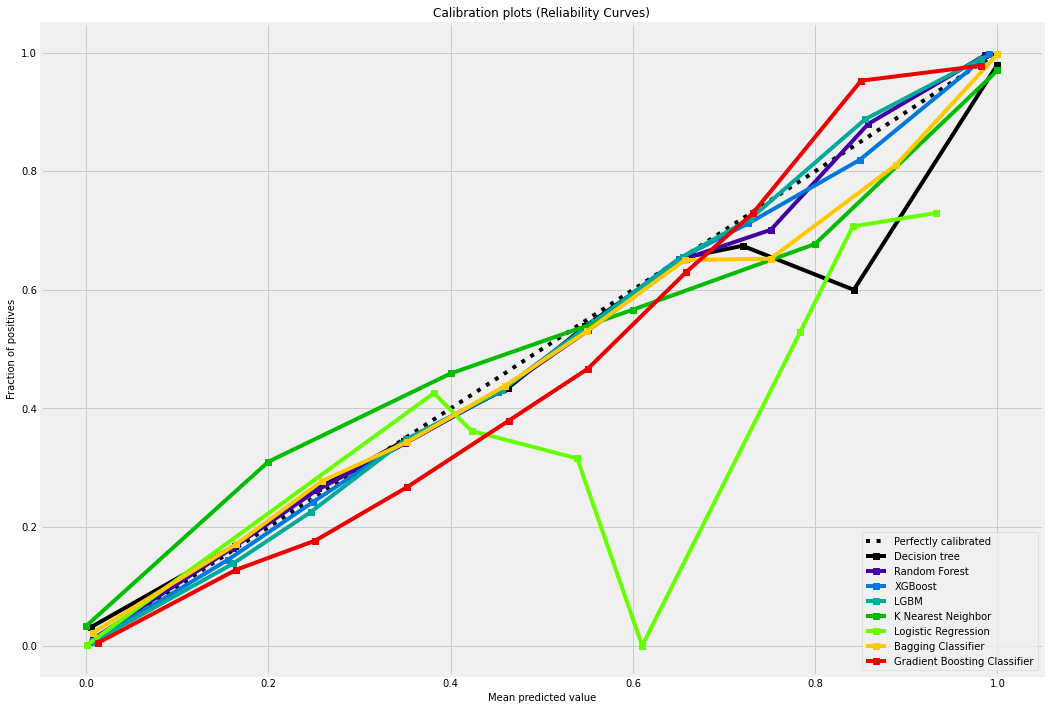

In [122]:
# fit a model
SEED=1

dt_clf = DecisionTreeClassifier(random_state=SEED)
rf_clf = RandomForestClassifier(random_state=SEED)
xgb_clf = XGBClassifier(random_state=SEED)
lgbm_clf = LGBMClassifier(random_state=SEED)
knn_clf = KNeighborsClassifier() 
log_clf = LogisticRegression(random_state=SEED)
bag_clf = BaggingClassifier(random_state=SEED)
gbst_clf = GradientBoostingClassifier(random_state=SEED)


# trains the classifiers
dt_clf.fit(x_train_selected, y_train)
rf_clf.fit(x_train_selected, y_train)
xgb_clf.fit(x_train_selected, y_train)
lgbm_clf.fit(x_train_selected, y_train)
knn_clf.fit(x_train_selected, y_train)
log_clf.fit(x_train_selected, y_train)
bag_clf.fit(x_train_selected, y_train)
gbst_clf.fit(x_train_selected, y_train)


# predict probabilities

dt_probs = dt_clf.predict_proba(x_val_selected)
rf_probs = rf_clf.predict_proba(x_val_selected)
xgb_probs = xgb_clf.predict_proba(x_val_selected)
lgbm_probs = lgbm_clf.predict_proba(x_val_selected)
knn_probs = knn_clf.predict_proba(x_val_selected)
log_probs = log_clf.predict_proba(x_val_selected)
bag_probs = bag_clf.predict_proba(x_val_selected)
gbst_probs = gbst_clf.predict_proba(x_val_selected)


probas_list = [dt_probs, rf_probs, xgb_probs, lgbm_probs, knn_probs, log_probs, bag_probs, gbst_probs]

clf_names = ['Decision tree', 'Random Forest', 'XGBoost', 'LGBM', 'K Nearest Neighbor', 'Logistic Regression', 'Bagging Classifier', 'Gradient Boosting Classifier']

skplt.metrics.plot_calibration_curve(y_val, probas_list, clf_names, figsize=(16,12))
plt.show()

### ROC curve

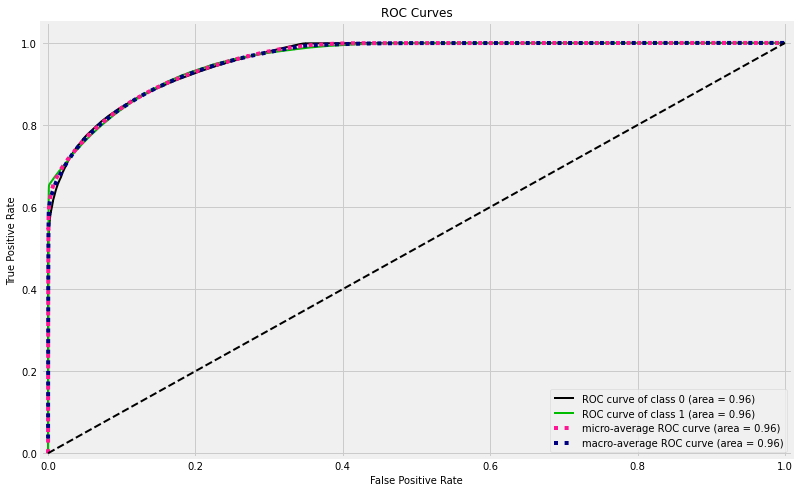

In [101]:

xgb_probs2 = best_xgb_selected.predict_proba(x_val_selected)

skplt.metrics.plot_roc(y_val, xgb_probs2, figsize=(12,8))
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.05)
plt.show()

### Gains curve to check the quality of the model against the baseline(non-use of machine learning)

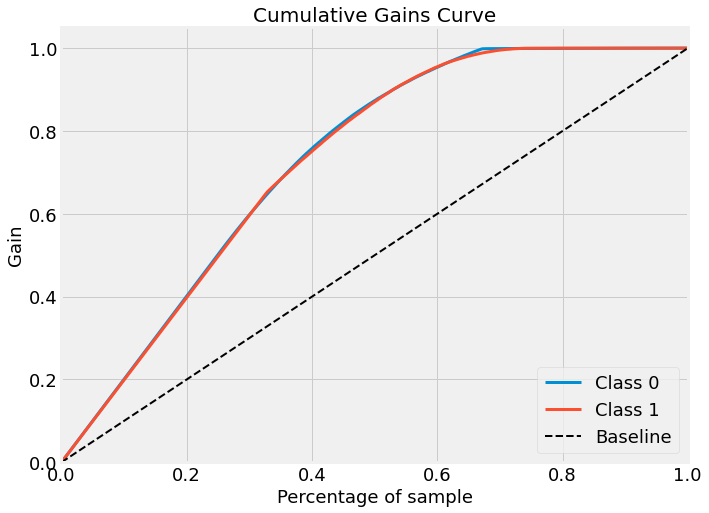

In [102]:
# get what the predicted probabilities are to use creating cumulative gains chart
probs = xgb_clf.predict_proba(x_val_selected)

skplt.metrics.plot_cumulative_gain(
    y_val, probs, figsize=(10, 8), title_fontsize=20, text_fontsize=18
)
plt.ylim(0,1.05)
plt.show()

### Lift curve to check the quality of the model against the baseline(non-use of machine learning)

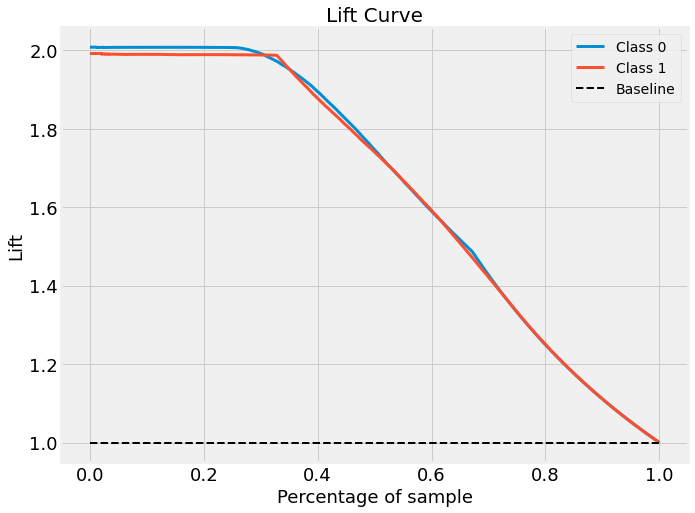

In [103]:
skplt.metrics.plot_lift_curve(
    y_val, probs, figsize=(10, 8), title_fontsize=20, text_fontsize=18
)
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.show()

___

### Three questions related to the business

In [104]:
def validation_recall(model, x, y, n):

    # x => x_val
    # y -> y_val

    df = pd.concat([x,y], axis=1)
    new_df = df.sample(n, random_state=1)

    y = new_df['Response']
    x_val = new_df.drop('Response', axis=1)

    pred = model.predict(x_val)
    recall = recall_score(y, pred)

    return recall, x_val, y

### What percentage of customers interested in purchasing auto insurance will the sales team be able to reach by making 20,000 calls?

In [105]:
recall_20000, x_val_20000, y_20000 = validation_recall(best_xgb_selected, x_val_selected, y_val, 20000)

In [106]:
print('The recall considering 20000 call is: {}'.format(round(recall_20000, 4)))

The recall considering 20000 call is: 0.8951


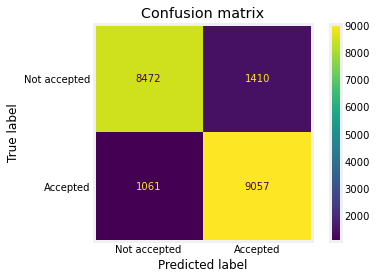

In [107]:
plot_confusion_matrix(best_xgb_selected, x_val_20000, y_20000)
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

___

### what if the sales team's capacity increases to 40,000 calls, what percentage of customers interested in purchasing auto insurance will the sales team be able to contact?

In [108]:
recall_40000, x_val_40000, y_40000 = validation_recall(best_xgb_selected, x_val_selected, y_val, 40000)

In [109]:
print('The recall considering 40000 call is: {}'.format(round(recall_40000, 4)))

The recall considering 40000 call is: 0.8943


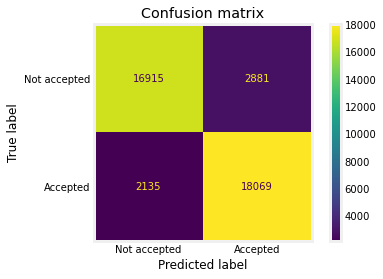

In [110]:
plot_confusion_matrix(best_xgb_selected, x_val_40000, y_40000)
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

___

### How many calls does the sales team need to make to contact 80% of customers interested in purchasing auto insurance?

In [111]:
all_customers_interested = pd.DataFrame(y_pred_xgb_best_model)

In [112]:
# 80% of all customers interested in purchasing auto insurance

all_customers_interested.value_counts()[1]*0.8

1    84074.4
dtype: float64

In [113]:
recall_all, x_val_all, y_all = validation_recall(best_xgb_selected, x_val_selected, y_val, 187650)

In [114]:
print('The recall considering all customers interested in auto insurance: {}'.format(round(recall_all, 4)))

The recall considering all customers interested in auto insurance: 0.891


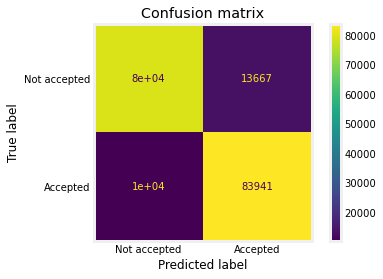

In [115]:
plot_confusion_matrix(best_xgb_selected, x_val_all, y_all)
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

### Answer: Around 187650 calls to contact 83984 customers interested in purchasing auto insurance

___

# References


https://scikit-learn.org/stable/modules/permutation_importance.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a

https://readthedocs.org/projects/scikit-plot/downloads/pdf/stable/

https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/